In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time
from matplotlib.colors import ListedColormap
import tqdm

In [0]:
def dist(X, Y):
  return -2* np.dot(X, Y.T) + np.sum(Y ** 2, axis=0)

def srednia(X):
  return np.sum(X, axis=0) / np.size(X, axis=0)

def kMeans(scope, K):
  change = True
  axis0 = np.size(scope, 0)
  axis1 = np.size(scope, 1)
  target = np.zeros(axis0)
  centroids = np.zeros((K, axis1))
  for i in range(K):
    centroids[i] = scope[random.randint(0, axis0-1)] 
  while change:       
    change = False
    for i in range(axis0): ##pętla do tworzenia grup 
      minimum = math.inf
      group = -1
      for k in range(K):
        distance = dist(scope[i], centroids[k])     
        if distance < minimum:
          minimum = distance
          group = k
      if group != target[i]:
        change = True
        target[i] = group
    for k in range(K):
      centroids[k] = srednia(scope[target==k])
  return centroids, target

Zadanie 1. (1 punkt)
Napisz program, który generuje zbiór N = 5000 losowych wektorów danych z mieszaniny
rozkładów gaussowskich o niżej podanych parametrach i sprawdź działanie algorytmu K-Means na
tym zbiorze (rozkład Choleskiego macierzy kowariancji można w Matlabie uzyskać poleceniem
chol, a w Pythonie poleceniem cholesky).
a) d = 2, K = 5, p = 1/K * 1, µk = 3k * 1, Σk = I (dla k = 1, 2, …, K), 

In [0]:
def generate(N, d, K, p, Sigma):
  
  mean = (np.ones((K, d)).T * np.arange(1, K+1) * 3).T
  mix = random.choices(range(K), weights=p, k=N)
  A = np.linalg.cholesky(Sigma)
  Z = np.random.randn(N, d)
  for i in range(N):
    Z[i] = mean[mix[i]] + np.dot(A[mix[i]], Z[i])

  return Z

teraz lecimy z podpunktami, pierw a)

czas:  1.5511329174041748


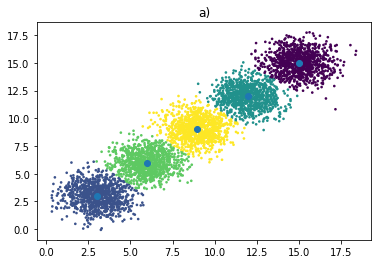

In [239]:
N = 5000
d = 2
K = 5
p = np.ones(K) / K
Sigma = np.array([np.eye(d)] * K)
data = generate(N, d, K, p, Sigma)
czas = time.time()
centra, targets = kMeans(data, K)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('a)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()

b)

czas:  3.7698917388916016


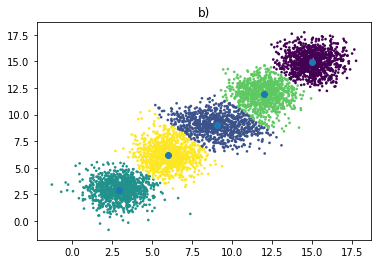

In [240]:
Sigma[2] = np.array([[3, 0], [0, 1]])
data = generate(N, d, K, p, Sigma)
czas = time.time()
centra, targets = kMeans(data, K)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('b)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()

c)

czas:  3.129777669906616


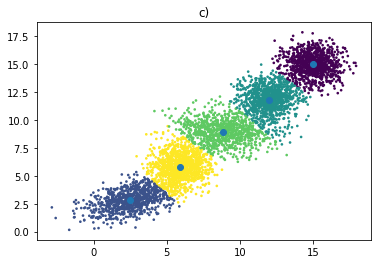

In [241]:
Sigma[0] = np.array([[3, 1], [1, 1]])

data = generate(N, d, K, p, Sigma)
czas = time.time()
centra, targets = kMeans(data, K)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('c)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()

d)

czas:  9.508363485336304


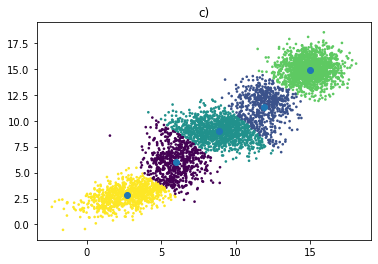

In [242]:
p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])

data = generate(N, d, K, p, Sigma)
czas = time.time()
centra, targets = kMeans(data, K)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('c)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()

e)

czas:  2.4050986766815186


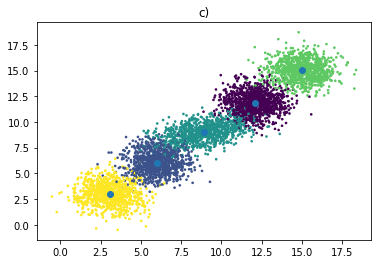

In [243]:
N = 5000
d = 3
K = 5
p = np.ones(K) / K
Sigma = np.array([np.eye(d)] * K)
Sigma[2] = np.array([[3, 1, 0], [1, 1, 0], [0, 0, 1]])

data = generate(N, d, K, p, Sigma)
czas = time.time()
centra, targets = kMeans(data, K)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('c)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()

f)

czas:  4.042029857635498


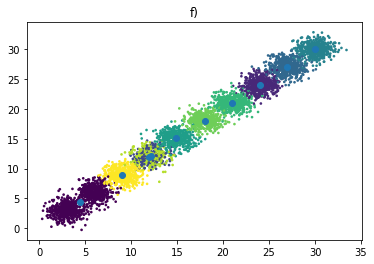

In [244]:
N = 5000
d = 100
K = 10
p = np.ones(K) / K
Sigma = np.array([np.eye(d)] * K)

data = generate(N, d, K, p, Sigma)
czas = time.time()
centra, targets = kMeans(data, K)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('f)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()